In [4]:
import hdcms as hdc
import matplotlib.pyplot as plt
from PIL import Image

First, we gather the data files into summary statistics.

In [5]:
compound1 = hdc.regex2stats1d(r"01-\d+.txt", dir="./data/CM1")
compound2 = hdc.regex2stats1d(r"02-\d+.txt", dir="./data/CM1")
compound3 = hdc.regex2stats1d(r"03-\d+.txt", dir="./data/CM1")

# Similarity

We will look at the similarity of the summary statistics we gathered above. To get an idea of what they look like, we can print them out:

In [6]:
print('shape:', compound1.shape)

with np.printoptions(threshold=50): # causes summarization since it's a shape 9000x2 array, remove to see all 9000 entries
    print('array:', compound1)

shape: (9000, 2)
array: [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Because they are a 9000 element array of pairs, it's hard too see what's going on. We can tell that most of the elements are 0. We can visualize the summary statistic better using the following.

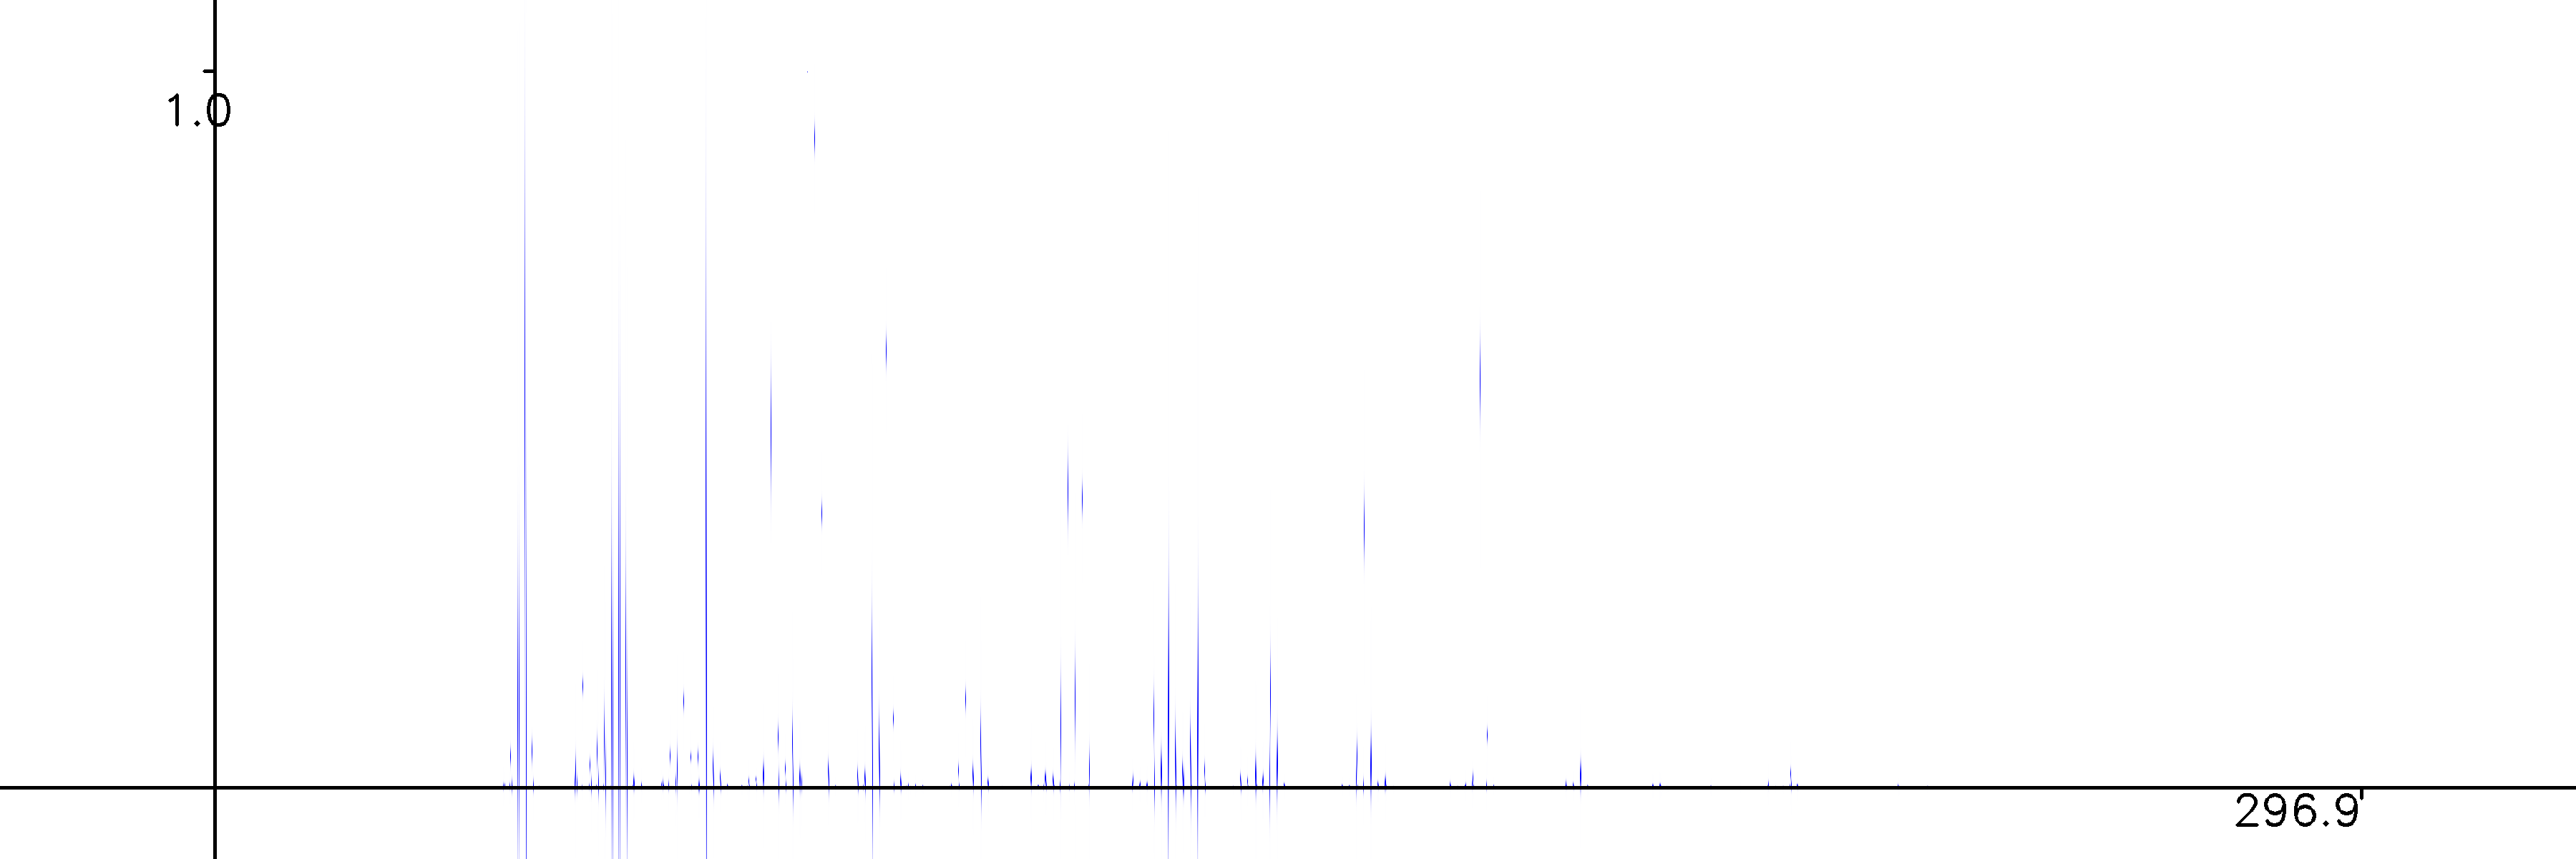

In [7]:
im = Image.fromarray(hdc.write_image(compound1))
display(im)
im.save("/tmp/tmp.png")

Finally, we can compare the compounds like so:

In [8]:
print(hdc.compare(compound1, compound2))
print()
print(hdc.compare(compound1, compound2, compound3))

0.029733101813582064

[[1.         0.0297331  0.03402488]
 [0.0297331  1.         0.02170931]
 [0.03402488 0.02170931 1.        ]]


# Library

Now, we will create a list of tuples (`name`, `summary_statistic`) to represent a library of mass spectra.

The resulting library will look like:
```
[
  ("01", [...]),
  ("02", [...]),
  ...,
]
```

In [9]:
library = [(name, hdc.regex2stats1d(f"{name}-\\d+.txt", dir="./data/CM1")) for name in [
    "01", "02", "03", "04", "05", "06", "07", "08", "09", 
    "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", 
    "20", "21", "22", "23", "24", "25", "26", "27", "28" 
]]

Next, we'll define a search function for our library. It will return a list of tuples (`name`, `similarity_score`), sorted by similarity score. The output will look like:

```
[
  ("11", 0.0323),
  ("02", 0.9881),
  ...,
]
```

In [10]:
def search(query_stat):
    results = [(name, round(hdc.compare(stat, query_stat), 3)) for name, stat in library]
    results.sort(key=lambda x: x[1], reverse=True)
    return results

Now we will look at how to use this search function on a previously defined summary statistic. And on a new one.

In [11]:
search(compound1)

[('01', 1.0),
 ('22', 0.105),
 ('11', 0.041),
 ('03', 0.034),
 ('02', 0.03),
 ('24', 0.03),
 ('10', 0.029),
 ('12', 0.029),
 ('05', 0.028),
 ('17', 0.028),
 ('15', 0.026),
 ('20', 0.026),
 ('16', 0.025),
 ('09', 0.024),
 ('19', 0.024),
 ('21', 0.023),
 ('26', 0.023),
 ('28', 0.023),
 ('23', 0.022),
 ('25', 0.02),
 ('07', 0.017),
 ('04', 0.016),
 ('06', 0.016),
 ('27', 0.016),
 ('14', 0.014),
 ('08', 0.011),
 ('18', 0.01),
 ('13', 0.009)]

In [12]:
compound28 = hdc.regex2stats1d(r"28-\d+.txt", dir="./data/CM1")
search(compound28)

[('28', 1.0),
 ('20', 0.282),
 ('21', 0.205),
 ('11', 0.066),
 ('17', 0.064),
 ('03', 0.05),
 ('05', 0.05),
 ('19', 0.047),
 ('16', 0.046),
 ('25', 0.041),
 ('10', 0.04),
 ('12', 0.039),
 ('09', 0.037),
 ('26', 0.037),
 ('06', 0.036),
 ('27', 0.036),
 ('15', 0.035),
 ('04', 0.031),
 ('24', 0.03),
 ('22', 0.029),
 ('07', 0.028),
 ('23', 0.025),
 ('02', 0.024),
 ('01', 0.023),
 ('14', 0.023),
 ('08', 0.007),
 ('18', 0.006),
 ('13', 0.005)]

Notice that in each example, we get a similarity score of 1 for the compound compared with itself. This is expected, since it means they are identical.